Epoch    0 | loss: 0.693147
Epoch  200 | loss: 0.495135
Epoch  400 | loss: 0.405734
Epoch  600 | loss: 0.354616
Epoch  800 | loss: 0.320878
Epoch 1000 | loss: 0.296559
Epoch 1200 | loss: 0.277975
Epoch 1400 | loss: 0.263175
Epoch 1600 | loss: 0.251024
Epoch 1800 | loss: 0.240810
Epoch 2000 | loss: 0.232065
Epoch 2200 | loss: 0.224464
Epoch 2400 | loss: 0.217775
Epoch 2600 | loss: 0.211827
Epoch 2800 | loss: 0.206490
Final loss: 0.201689
Accuracy: 0.9733  (97.33%)
w = [1.8675 2.5178] , b = 0.5838


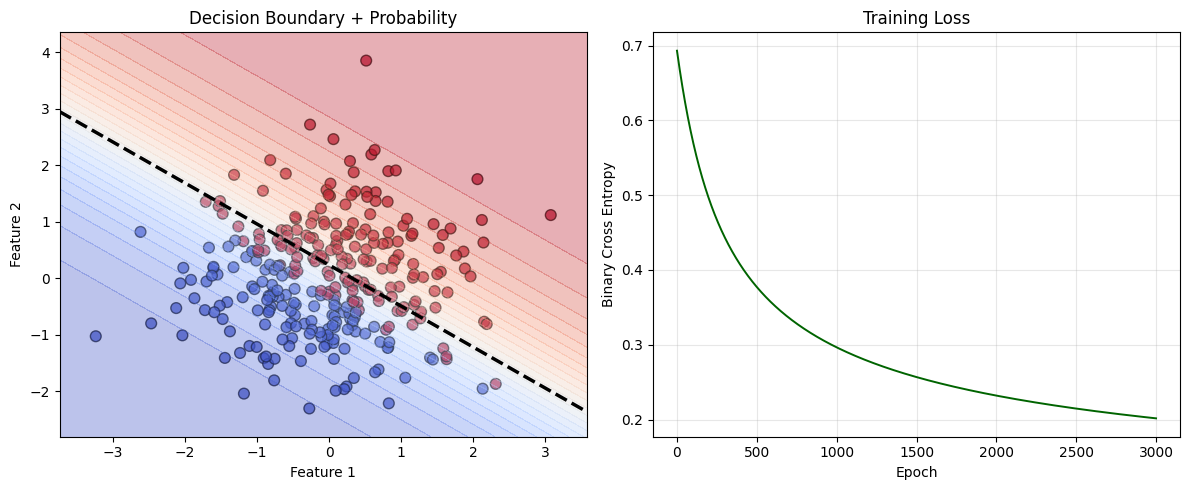

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, lr=0.01, epochs=2000, tol=1e-4):
        self.lr = lr
        self.epochs = epochs
        self.tol = tol
        self.w = None
        self.b = 0.0
        self.losses = []

    def _sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.losses = []

        prev_loss = np.inf

        for i in range(self.epochs):
            z = X @ self.w + self.b
            y_pred = self._sigmoid(z)

            loss = -np.mean(y * np.log(y_pred + 1e-10) + (1-y) * np.log(1-y_pred + 1e-10))
            self.losses.append(loss)


            if abs(prev_loss - loss) < self.tol:
                print(f"Early stopping at epoch {i}")
                break
            prev_loss = loss


            dw = (y_pred - y) @ X / n_samples
            db = np.mean(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db


            if i % 200 == 0:
                print(f"Epoch {i:4d} | loss: {loss:.6f}")

        return self

    def predict_proba(self, X):
        X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)
        return self._sigmoid(X @ self.w + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)


    def plot_decision_boundary(self, X, y):

        X_norm = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7, edgecolors='k', s=60)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                            np.linspace(y_min, y_max, 200))

        Z = self.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.35, cmap='coolwarm', levels=25)
        plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2.5, linestyles='--')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary + Probability')

        plt.subplot(1, 2, 2)
        plt.plot(self.losses, 'darkgreen', lw=1.4)
        plt.xlabel('Epoch')
        plt.ylabel('Binary Cross Entropy')
        plt.title('Training Loss')
        plt.grid(alpha=0.3)

        plt.tight_layout()
        plt.show()



if __name__ == "__main__":
    np.random.seed(42)
    X = np.random.randn(300, 2)
    y = (X[:,0] + 1.3*X[:,1] + 0.4 > 0).astype(int)

    model = LogisticRegression(lr=0.01, epochs=3000, tol=1e-5)
    model.fit(X, y)

    acc = np.mean(model.predict(X) == y)
    print(f"Final loss: {model.losses[-1]:.6f}")
    print(f"Accuracy: {acc:.4f}  ({acc*100:.2f}%)")
    print(f"w = {model.w.round(4)} , b = {model.b:.4f}")

    model.plot_decision_boundary(X, y)